In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sd
import argparse
import matplotlib.pyplot as plt
from dataclasses import dataclass
import torch



In [28]:
@dataclass
class GlobalConfig:
    device = "cuda"
    sd_model_key = "/data/model/stable-diffusion-2-1-base"
    samples_num = 1000
global_config = GlobalConfig()


@dataclass
class SdConfig:
    device = "cuda"
    sd_model_key = "/data/model/stable-diffusion-2-1-base"
    H = 512
    W = 512
    steps = 1
    t_range = [0.02, 0.98]
    batch_size = 8
    use_embeddings = False
    gradient_checkpointing = True
    dtype = torch.float32
    negative = ""
sd_config = SdConfig()

## sd

In [29]:
my_sd = sd.MyStableDiffusion(global_config.device, global_config.sd_model_key, sd_config)

[INFO] loading stable diffusion...


[INFO] loaded stable diffusion!


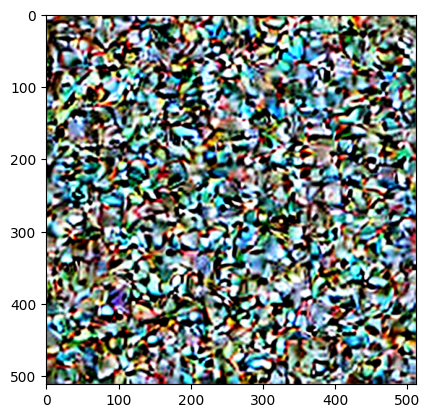

<class 'torch.Tensor'>


In [30]:
latents = my_sd.prompts_to_latents(sd_config.prompt, sd_config.negative, sd_config.H, sd_config.W, sd_config.steps)
imgs = my_sd.decode_latents(latents).cpu()
# visualize image
plt.imshow(imgs[0].T)
plt.show()
print(type(imgs))

In [39]:
sd_data = []
for i in range(global_config.samples_num):
    latent = my_sd.prompts_to_latents(sd_config.prompt, sd_config.negative, sd_config.H, sd_config.W, sd_config.steps)[0].cpu()
    latent_mean = latent.mean()
    sd_data.append(latent_mean)


0.00012974138 0.008004398 0.03722877 -0.024318732


In [ ]:
print(np.mean(sd_data),np.std(sd_data),np.max(sd_data),np.min(sd_data))

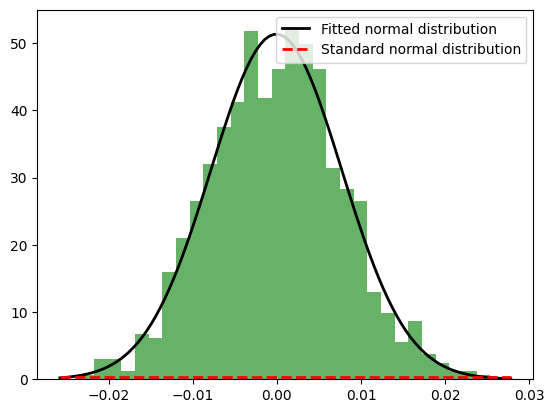

In [36]:
from scipy.stats import norm
from scipy.optimize import curve_fit

np.random.seed(0)
data = sd_data

mu, std = norm.fit(data)

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

p_std = norm.pdf(x, 0, 1)  # 修改为标准正态分布的参数
plt.plot(x, p_std, 'r--', linewidth=2)

plt.legend(['Fitted normal distribution', 'Standard normal distribution'])

plt.show()

1.932114938764707 1.4805497380035386


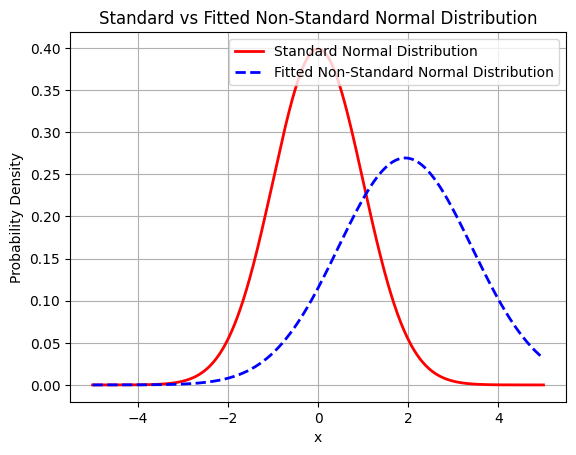

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# 生成x轴数据
x = np.linspace(-5, 5, 1000)

# 计算标准正态分布的概率密度函数值
y_std = norm.pdf(x, 0, 1)

# 拟合非标准正态分布
def non_standard_normal(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# 生成随机数据
np.random.seed(0)
data = np.random.normal(loc=2, scale=1.5, size=1000)  # 修改为您的数据
# data = sd_data
print(np.mean(data),np.std(data))
# 拟合数据
params, _ = curve_fit(non_standard_normal, x, norm.pdf(x, np.mean(data), np.std(data)))

# 绘制标准正态分布曲线
plt.plot(x, y_std, 'r-', label='Standard Normal Distribution', linewidth=2)

# 绘制拟合的非标准正态分布曲线
plt.plot(x, non_standard_normal(x, *params), 'b--', label='Fitted Non-Standard Normal Distribution', linewidth=2)

# 添加标题和标签
plt.title('Standard vs Fitted Non-Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

# 显示图形
plt.grid(True)
plt.show()
